In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.animation import FuncAnimation as FA

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

/tmp/ipykernel_427345/2262046893.py:23: UserWarning: No contour levels were found within the data range.
  ax[ind].contour(x, A, Z.imag != 0, colors='purple', linestyles='-.')


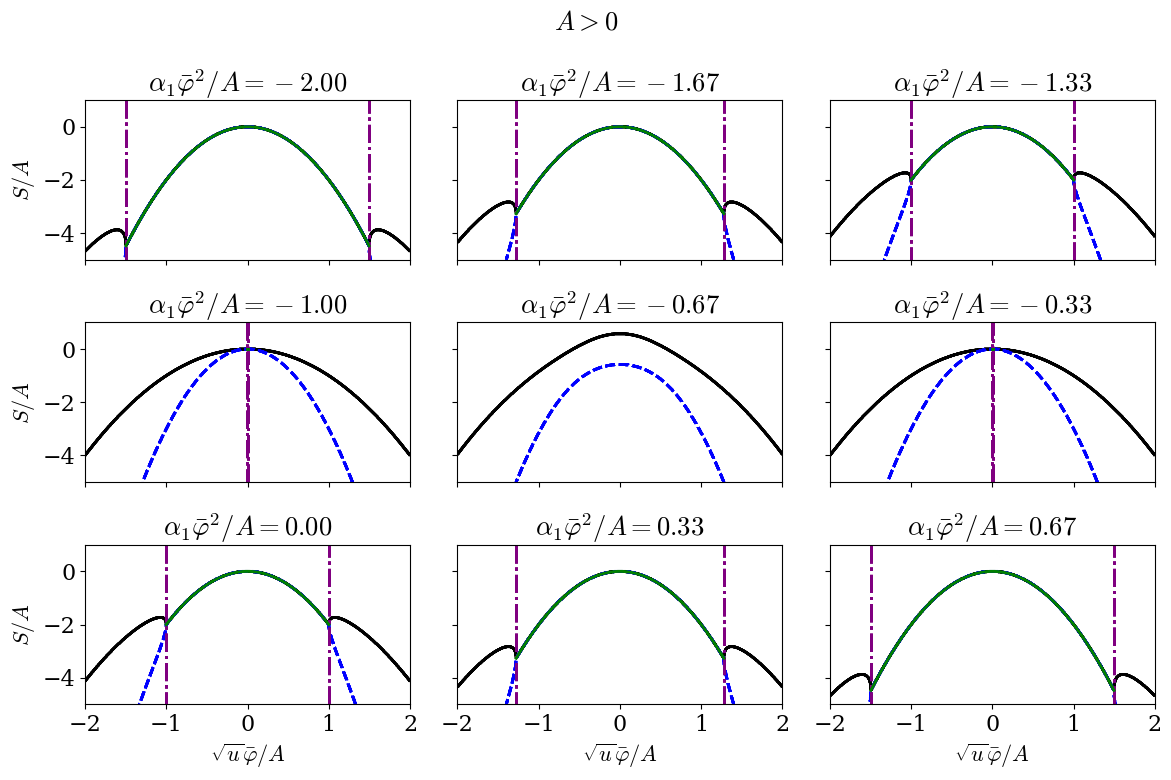

In [33]:
lm = lambda S, x, y : S + 2*x**2 - np.sqrt(x**4 - (1 + y) * (1 + 3*y) + 0j)
lp = lambda S, x, y : S + 2*x**2 + np.sqrt(x**4 - (1 + y) * (1 + 3*y) + 0j)

n = 3
eps = 1e-9
yList = np.linspace(-2 - eps, 2/3 + eps, n**2)

A = np.linspace(1, -5, 500)
x = np.linspace(-2, 2, 1000)

A, x = np.meshgrid(A, x)
c = ['k', 'b']
ls = ['-', '--']

fig, ax = plt.subplots(n, n, figsize=(12 , 8), sharex=True, sharey=True)
for k, y in enumerate(yList):
    ind = (k//n, k%n)
    
    for i, l in enumerate([lm, lp]):
        Z = l(A, x, y)
        ax[ind].contour(x, A, Z.real<0, colors=c[i], linestyles=ls[i], linewidths=1.9)
    
    ax[ind].contour(x, A, Z.imag != 0, colors='purple', linestyles='-.')
    
    ax[ind].set_title('$\\alpha_1 \\bar \\varphi^2 /A '+ "={y:.2f}$".format(y=y))
    
    if ind[0]==2:
        ax[ind].set_xlabel("$\\sqrt{u} \\bar \\varphi /A $")
    if ind[1]==0:
        ax[ind].set_ylabel("$S / A$")

    if y<-1 or y>-1/3:
        pcep = ((1 + y) * (1 + 3*y))**(1/4)
        p = np.linspace(-pcep, pcep)
        ax[ind].plot(p, -2*p**2, color='green', linestyle='-', lw=2.1)


fig.suptitle("$A>0$")
plt.tight_layout()
fig.savefig("phase.pdf")
plt.show()

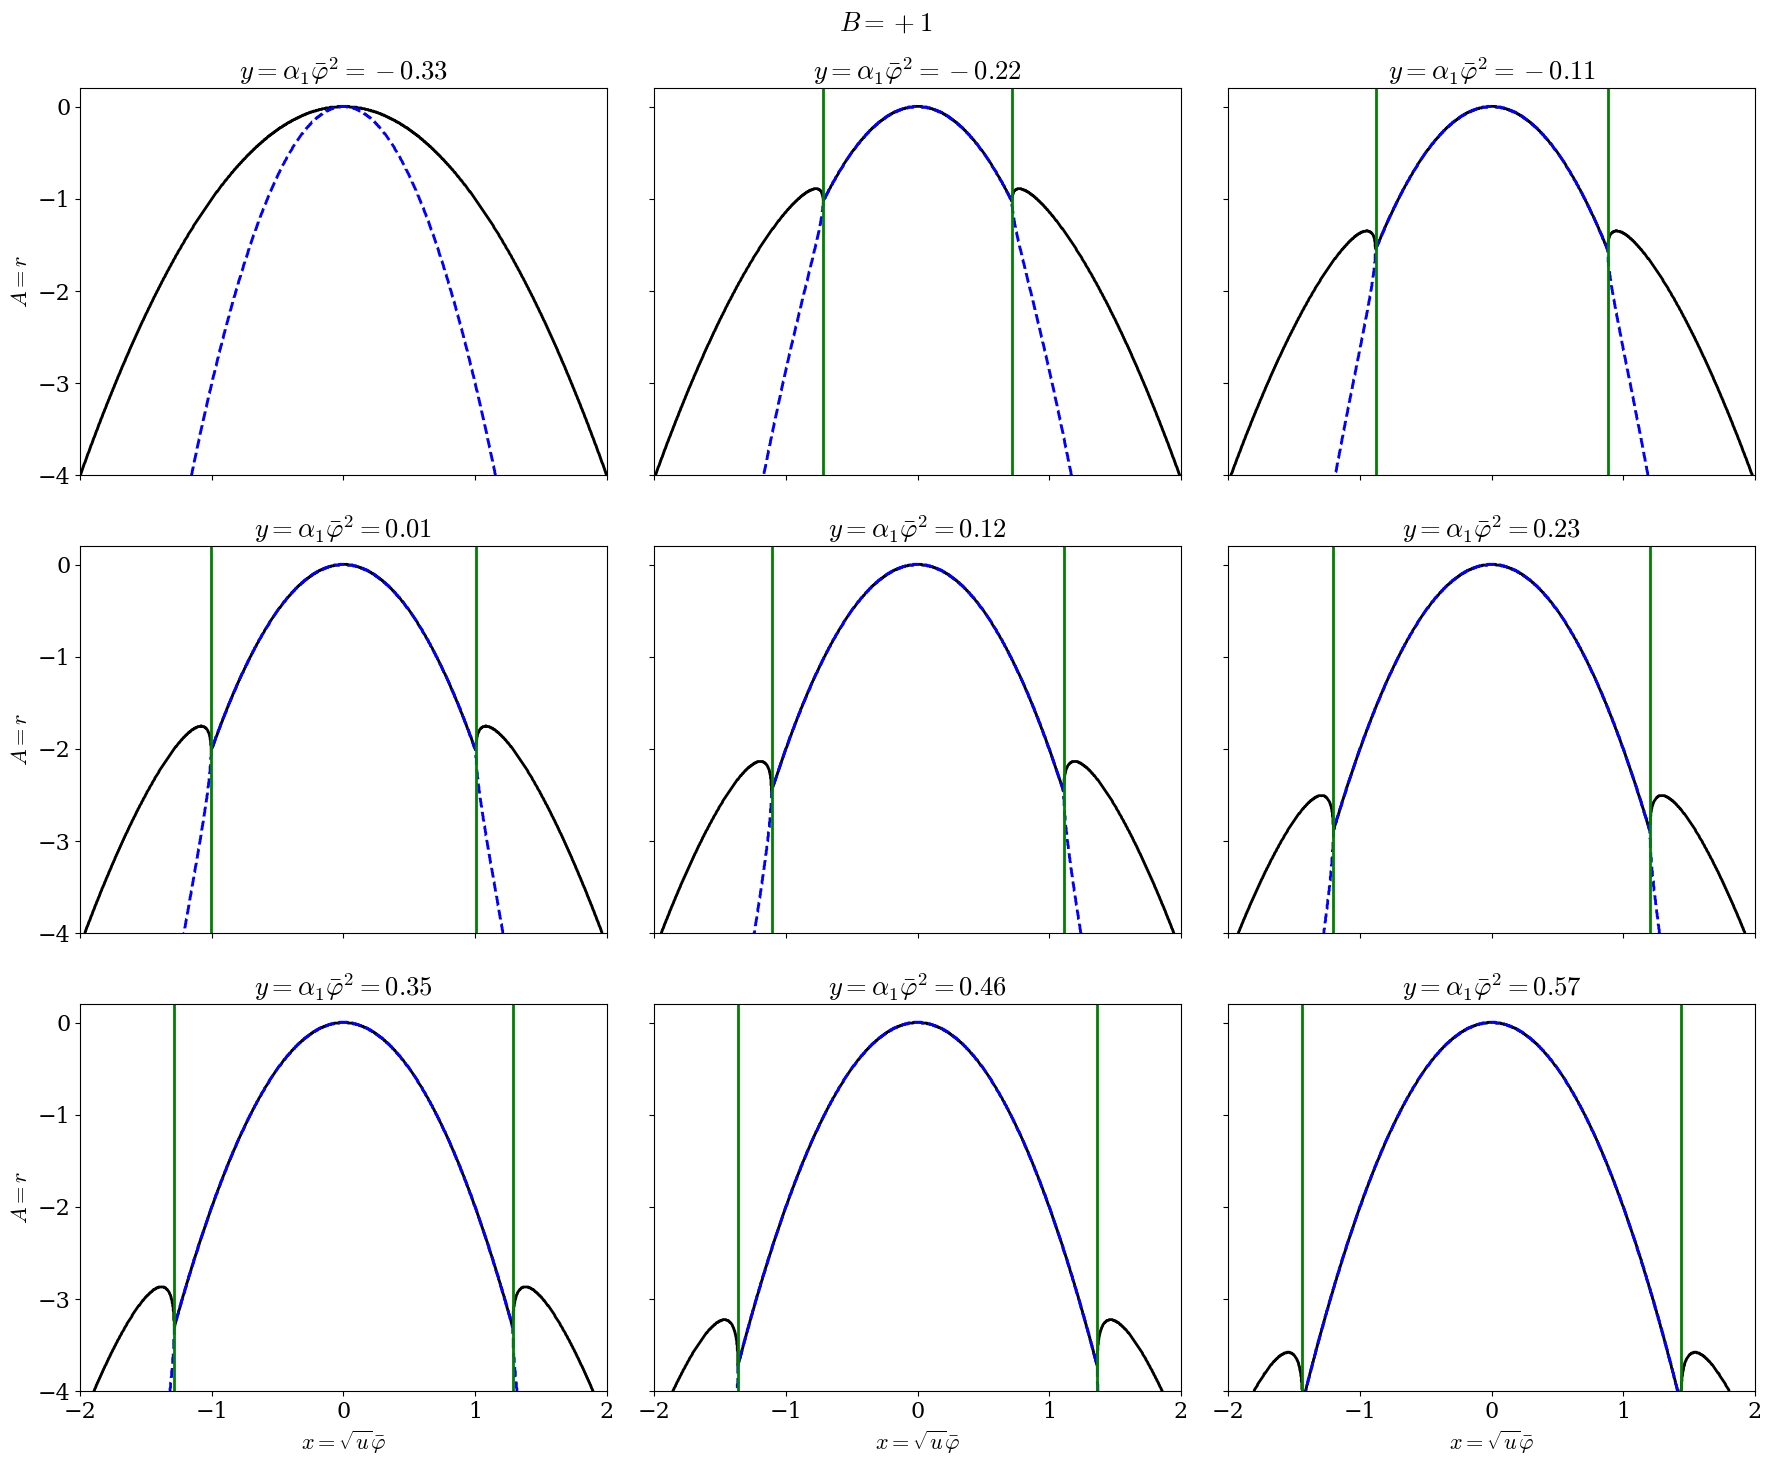

In [ ]:
lm = lambda A, x, y : A + 2*x**2 - np.sqrt(x**4 - (1 + y) * (1 + 3*y) + 0j)
lp = lambda A, x, y : A + 2*x**2 + np.sqrt(x**4 - (1 + y) * (1 + 3*y) + 0j)

n = 3
d = .57143
# d = 
yList = np.linspace(-1/3, d, n**2)

A = np.linspace(.2, -4, 500)
x = np.linspace(-2, 2, 1000)

A, x = np.meshgrid(A, x)
c = ['k', 'b']
ls = ['-', '--']

fig, ax = plt.subplots(n, n, figsize=(18, 15), sharex=True, sharey=True)
for k, y in enumerate(yList):
    ind = (k//n, k%n)
    
    for i, l in enumerate([lm, lp]):
        Z = l(A, x, y)
        ax[ind].contour(x, A, Z.real<0, colors=c[i], linestyles=ls[i])
    
    ax[ind].contour(x, A, Z.imag != 0, colors='green')
    ax[ind].set_title('$y = \\alpha_1\\bar\\varphi^2'+ "={y:.2f}$".format(y=y))
    if ind[0]==2:
        ax[ind].set_xlabel("$x = \\sqrt{ u } \\bar\\varphi$")
    if ind[1]==0:
        ax[ind].set_ylabel("$A = r$")

fig.suptitle("$B=+1$")
plt.tight_layout()
plt.show()